In [1]:
# 위치에 따라 기울기가 달라지는 함수(비등방성 함수)에서는 비효율적
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

In [2]:
import numpy as np
# 기울기에 따라 속도(momentum)를 조절하여 최적화
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

In [3]:
import numpy as np

# 학습률을 낮춰가며 학습을 진행
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
    
    def update(self, params, grads):
        if self.h is None:
            self.h = {}

            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / np.sqrt(self.h[key] + 1e-7)

In [15]:
import numpy as np

# Adam: Adaptive Moment Estimation
# 1차 모멘텀(momentum)과 2차 모멘텀(AdaGrad 스타일)을 결합한 최적화 알고리즘
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1  # 1차 모멘텀 계수
        self.beta2 = beta2  # 2차 모멘텀 계수
        self.iter = 0
        self.m = None  # 1차 모멘텀 (기울기의 지수 이동 평균)
        self.v = None  # 2차 모멘텀 (기울기 제곱의 지수 이동 평균)

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        
        for key in params.keys():
            # 1차 모멘텀 업데이트
            self.m[key] = self.beta1 * self.m[key] + (1 - self.beta1) * grads[key]
            
            # 2차 모멘텀 업데이트
            self.v[key] = self.beta2 * self.v[key] + (1 - self.beta2) * (grads[key] ** 2)
            
            # 편향 보정 (bias correction)
            m_hat = self.m[key] / (1.0 - self.beta1 ** self.iter)
            v_hat = self.v[key] / (1.0 - self.beta2 ** self.iter)
            
            # 파라미터 업데이트
            params[key] -= self.lr * m_hat / (np.sqrt(v_hat) + 1e-7)

In [5]:
# 최적화할 함수: f(x,y) = 1/20 * x^2 + y^2
def f(x, y):
    return x**2 / 20.0 + y**2

# 함수의 기울기(gradient) 계산
def df(x, y):
    return x / 10.0, 2.0 * y

In [6]:
# 각 최적화 알고리즘의 학습 경로를 기록
def optimize(optimizer, init_pos=(-7.0, 2.0), lr=0.01, iters=30):
    """
    최적화 알고리즘을 실행하고 경로를 기록
    
    Args:
        optimizer: 최적화 알고리즘 인스턴스
        init_pos: 초기 위치 (x, y)
        lr: 학습률
        iters: 반복 횟수
    
    Returns:
        x_history, y_history: x, y 좌표의 이동 경로
    """
    x, y = init_pos[0], init_pos[1]
    x_history, y_history = [x], [y]
    
    params = {'x': np.array([x]), 'y': np.array([y])}
    
    for i in range(iters):
        grads = {}
        grads['x'], grads['y'] = df(params['x'][0], params['y'][0])
        grads['x'] = np.array([grads['x']])
        grads['y'] = np.array([grads['y']])
        
        optimizer.update(params, grads)
        
        x_history.append(params['x'][0])
        y_history.append(params['y'][0])
    
    return x_history, y_history

In [16]:
# 각 최적화 알고리즘 실행
init_pos = (-7.0, 2.0)
iters = 30

sgd_x, sgd_y = optimize(SGD(lr=0.95), init_pos, iters=iters)
momentum_x, momentum_y = optimize(Momentum(lr=0.1), init_pos, iters=iters)
adagrad_x, adagrad_y = optimize(AdaGrad(lr=1.5), init_pos, iters=iters)
adam_x, adam_y = optimize(Adam(lr=0.3), init_pos, iters=iters)

print("Optimization paths calculated")
print(f"SGD: start=({sgd_x[0]:.2f}, {sgd_y[0]:.2f}), end=({sgd_x[-1]:.2f}, {sgd_y[-1]:.2f})")
print(f"Momentum: start=({momentum_x[0]:.2f}, {momentum_y[0]:.2f}), end=({momentum_x[-1]:.2f}, {momentum_y[-1]:.2f})")
print(f"AdaGrad: start=({adagrad_x[0]:.2f}, {adagrad_y[0]:.2f}), end=({adagrad_x[-1]:.2f}, {adagrad_y[-1]:.2f})")
print(f"Adam: start=({adam_x[0]:.2f}, {adam_y[0]:.2f}), end=({adam_x[-1]:.2f}, {adam_y[-1]:.2f})")

Optimization paths calculated
SGD: start=(-7.00, 2.00), end=(-0.35, 0.08)
Momentum: start=(-7.00, 2.00), end=(0.90, 0.09)
AdaGrad: start=(-7.00, 2.00), end=(-0.12, 0.00)
Adam: start=(-7.00, 2.00), end=(0.14, 0.32)


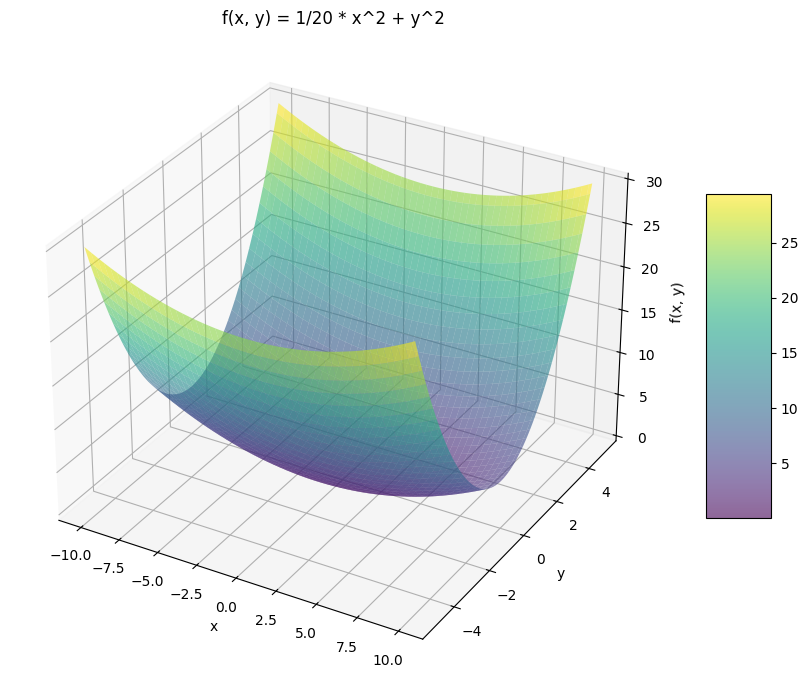

In [8]:
# 1. 함수의 3D 그래프 시각화
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 그리드 생성
x = np.linspace(-10, 10, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 표면 그래프
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('f(x, y) = 1/20 * x^2 + y^2')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

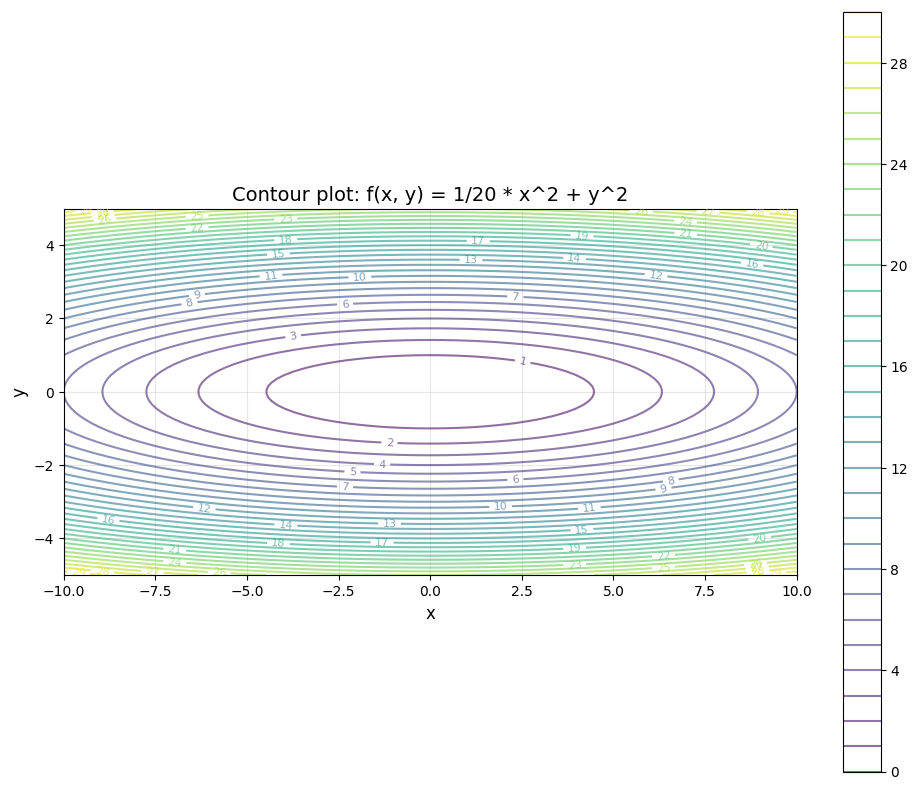

In [9]:
# 2. 함수의 등고선 그래프
fig, ax = plt.subplots(figsize=(10, 8))

# 등고선 그리기
contour = ax.contour(X, Y, Z, levels=30, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Contour plot: f(x, y) = 1/20 * x^2 + y^2', fontsize=14)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.colorbar(contour, ax=ax)
plt.tight_layout()
plt.show()

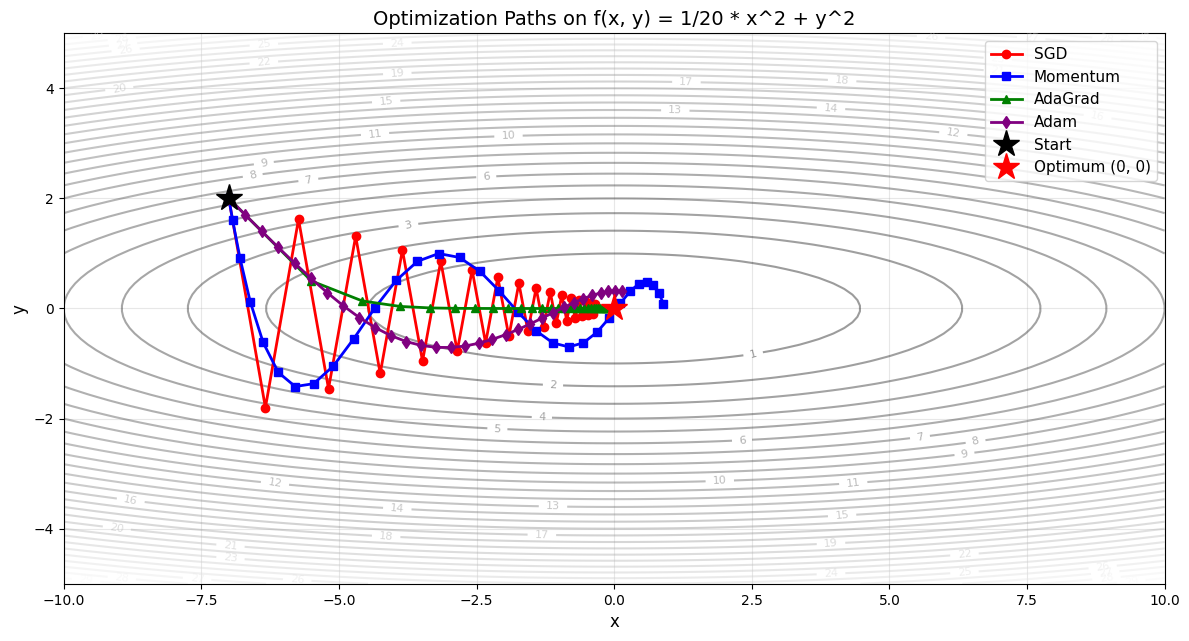

In [17]:
# 3. 등고선 + 최적화 알고리즘 경로 시각화
fig, ax = plt.subplots(figsize=(12, 10))

# 등고선 그리기
contour = ax.contour(X, Y, Z, levels=30, cmap='gray', alpha=0.4)
ax.clabel(contour, inline=True, fontsize=8)

# 각 최적화 알고리즘의 경로 그리기
ax.plot(sgd_x, sgd_y, 'o-', color='red', label='SGD', linewidth=2, markersize=6)
ax.plot(momentum_x, momentum_y, 's-', color='blue', label='Momentum', linewidth=2, markersize=6)
ax.plot(adagrad_x, adagrad_y, '^-', color='green', label='AdaGrad', linewidth=2, markersize=6)
ax.plot(adam_x, adam_y, 'd-', color='purple', label='Adam', linewidth=2, markersize=6)

# 시작점 표시
ax.plot(init_pos[0], init_pos[1], 'k*', markersize=20, label='Start', zorder=5)

# 최소값 위치 표시 (0, 0)
ax.plot(0, 0, 'r*', markersize=20, label='Optimum (0, 0)', zorder=5)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Optimization Paths on f(x, y) = 1/20 * x^2 + y^2', fontsize=14)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

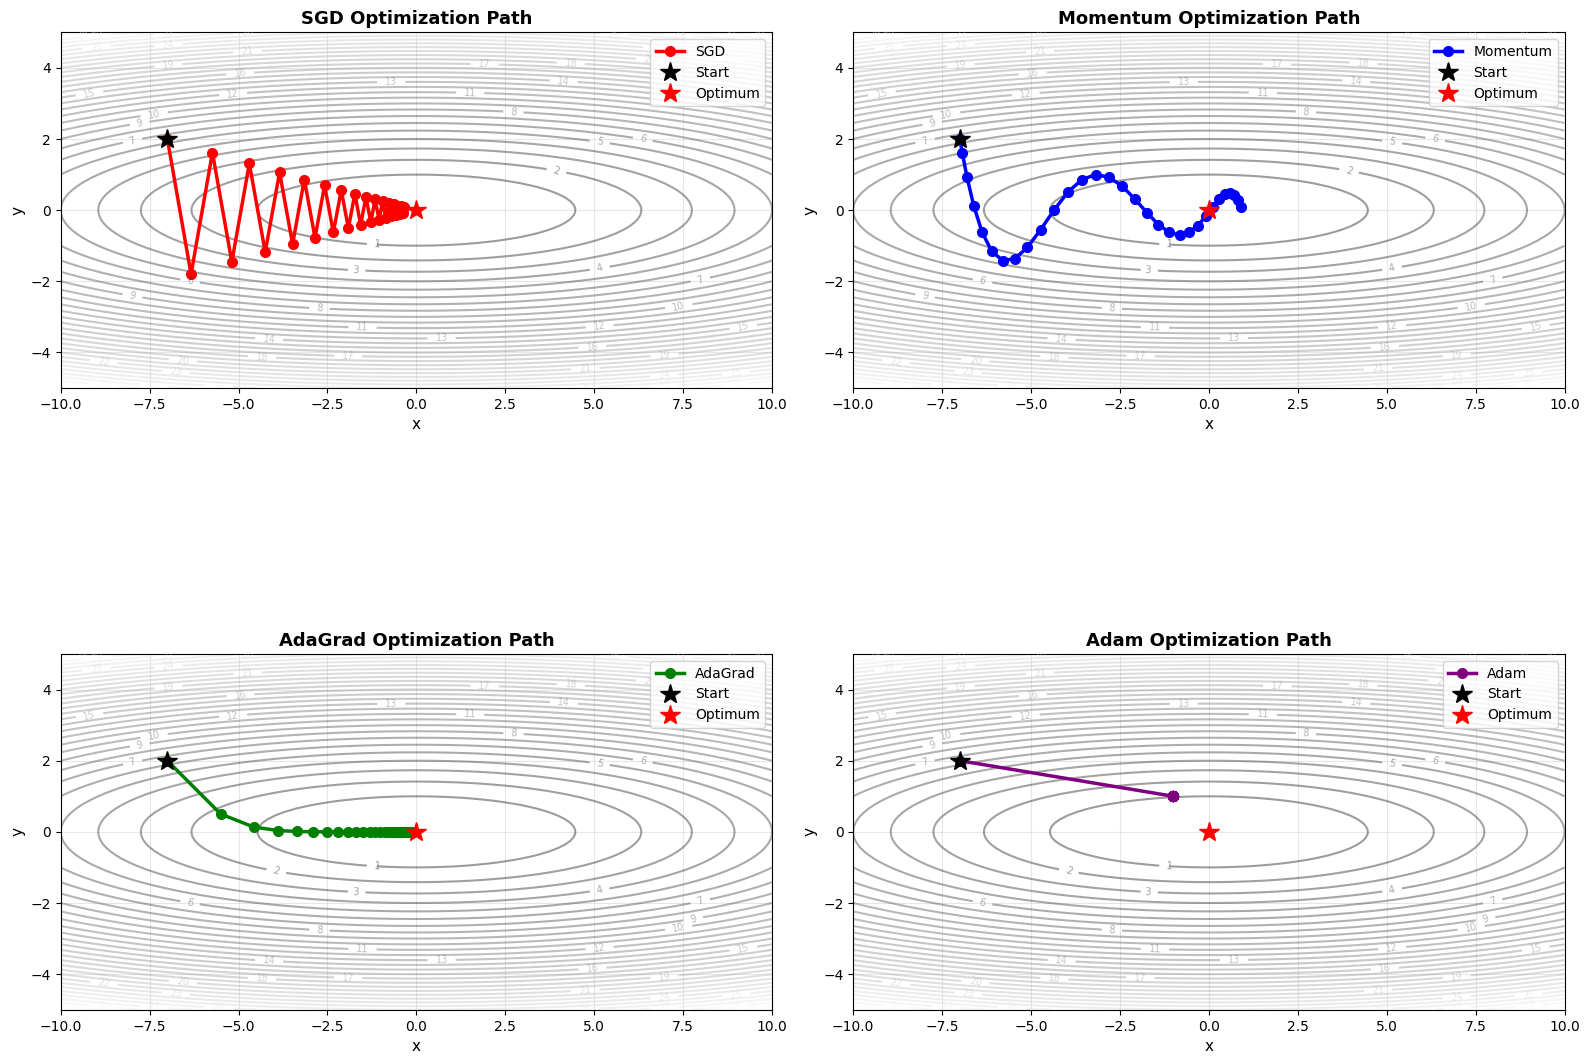

In [11]:
# 4. 각 최적화 알고리즘 개별 비교 (2x2 subplot)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

optimizers_data = [
    (sgd_x, sgd_y, 'SGD', 'red'),
    (momentum_x, momentum_y, 'Momentum', 'blue'),
    (adagrad_x, adagrad_y, 'AdaGrad', 'green'),
    (adam_x, adam_y, 'Adam', 'purple')
]

for idx, (opt_x, opt_y, name, color) in enumerate(optimizers_data):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # 등고선
    contour = ax.contour(X, Y, Z, levels=30, cmap='gray', alpha=0.4)
    ax.clabel(contour, inline=True, fontsize=7)
    
    # 최적화 경로
    ax.plot(opt_x, opt_y, 'o-', color=color, linewidth=2.5, markersize=7, label=name)
    
    # 시작점과 최소값
    ax.plot(init_pos[0], init_pos[1], 'k*', markersize=15, label='Start', zorder=5)
    ax.plot(0, 0, 'r*', markersize=15, label='Optimum', zorder=5)
    
    ax.set_xlabel('x', fontsize=11)
    ax.set_ylabel('y', fontsize=11)
    ax.set_title(f'{name} Optimization Path', fontsize=13, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()